In [2]:
#import all the
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#getting the source file
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


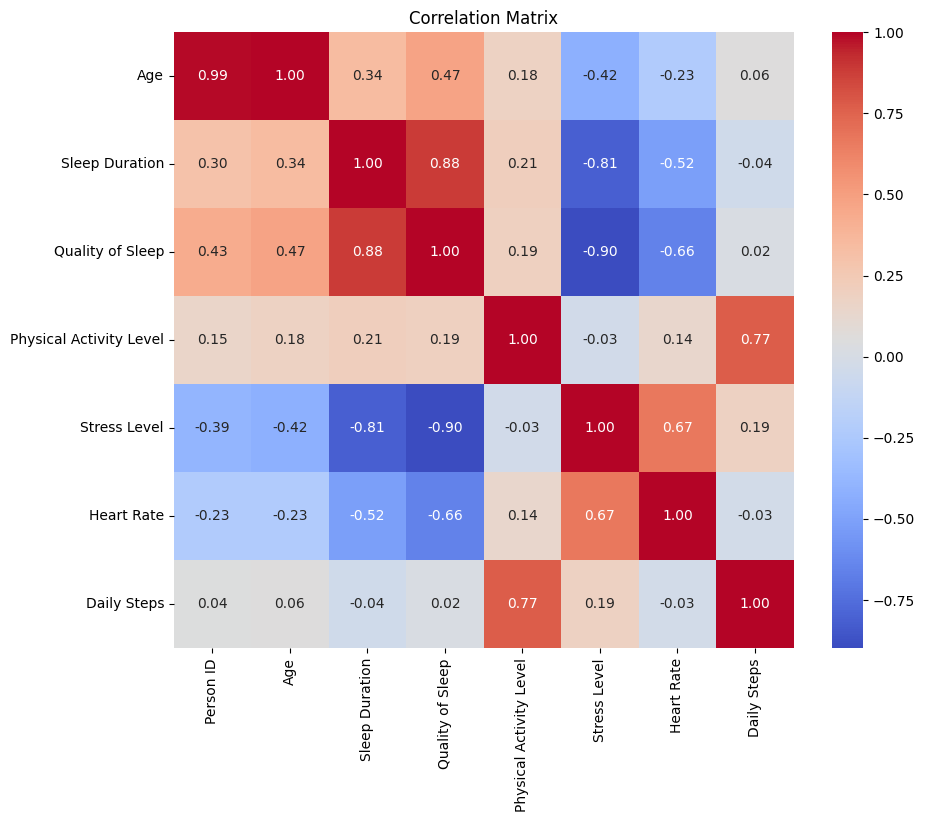

In [ ]:
# Make a Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True).drop('Person ID'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Categorical Data Processing


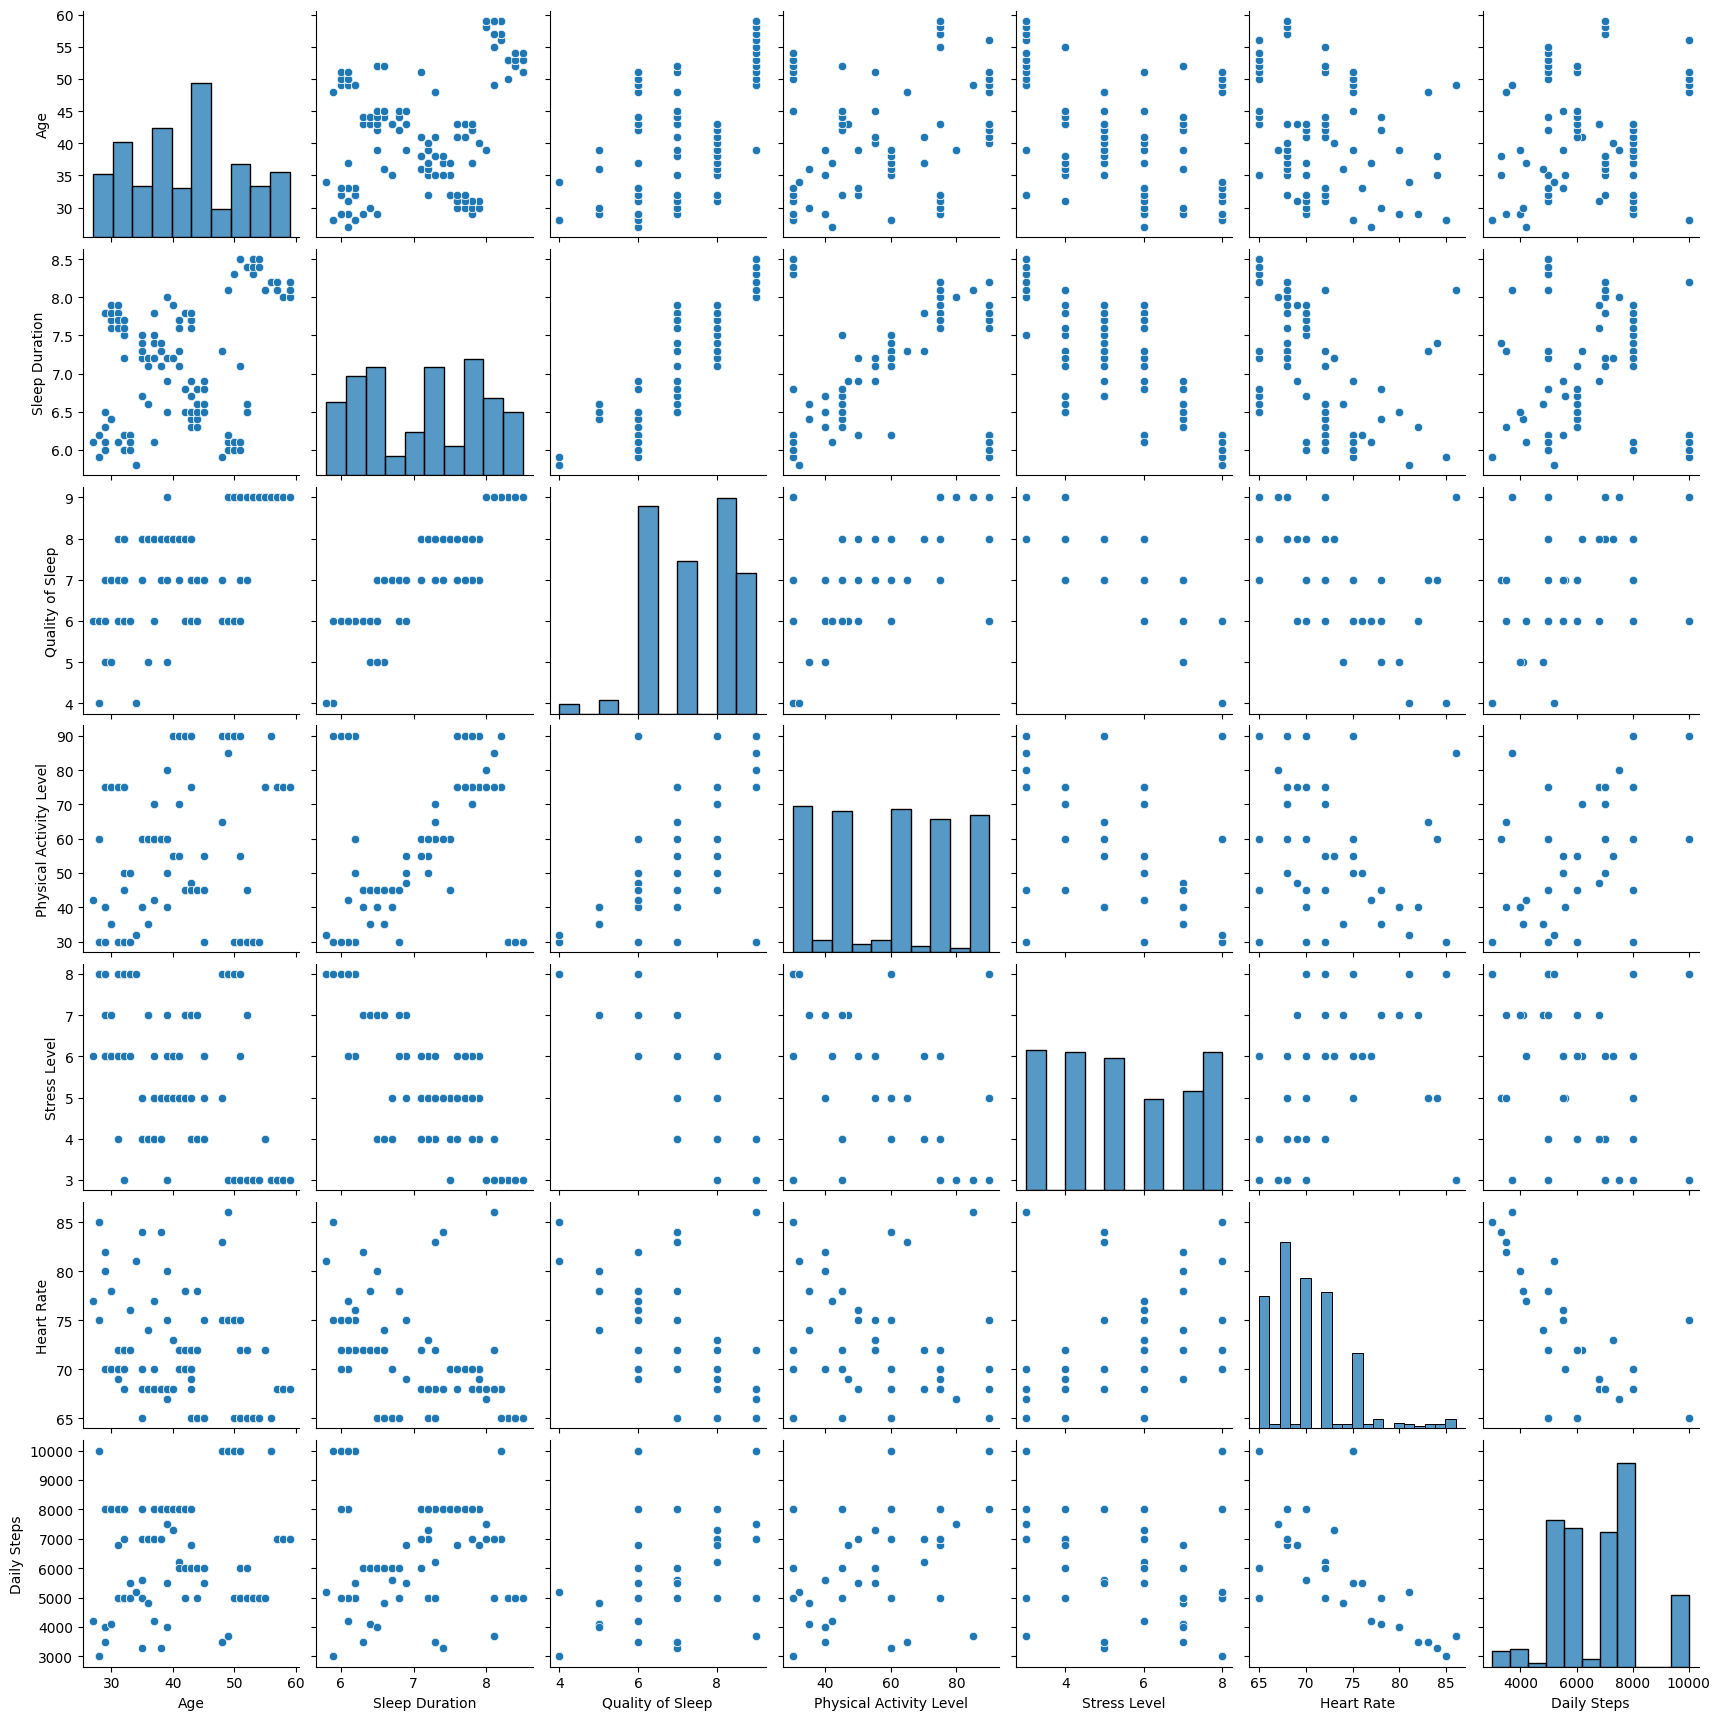

In [ ]:
sns.pairplot(df[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']])
plt.show()

In [ ]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
# Define the variable names that are categorical for use later
cat_var_names =  ['Gender', 'Occupation','BMI Category','Blood Pressure','Stress Level']
data_cat = df[cat_var_names]
data_cat.head()

,Gender,Occupation,BMI Category,Blood Pressure,Stress Level
0,Male,Software Engineer,Overweight,126/83,6
1,Male,Doctor,Normal,125/80,8
2,Male,Doctor,Normal,125/80,8
3,Male,Sales Representative,Obese,140/90,8
4,Male,Sales Representative,Obese,140/90,8


In [ ]:
from sklearn.preprocessing import OneHotEncoder
dummy_e = OneHotEncoder(categories='auto', drop='first', sparse_output=False)
dummy_e.fit(data_cat);
dummy_e.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse',
        'Sales Representative', 'Salesperson', 'Scientist',
        'Software Engineer', 'Teacher'], dtype=object),
 array(['Normal', 'Normal Weight', 'Obese', 'Overweight'], dtype=object),
 array(['115/75', '115/78', '117/76', '118/75', '118/76', '119/77',
        '120/80', '121/79', '122/80', '125/80', '125/82', '126/83',
        '128/84', '128/85', '129/84', '130/85', '130/86', '131/86',
        '132/87', '135/88', '135/90', '139/91', '140/90', '140/95',
        '142/92'], dtype=object),
 array([3, 4, 5, 6, 7, 8])]

In [ ]:
temp = dummy_e.transform(data_cat)

In [ ]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df['Quality of Sleep'].value_counts()

,count
Quality of Sleep,
8,109
6,105
7,77
9,71
5,7
4,5


In [ ]:
df['Gender'].replace({'Male':-1, 'Female':1},inplace=True)

<ipython-input-8-e7c6eae516ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':-1, 'Female':1},inplace=True)
<ipython-input-8-e7c6eae516ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':-1, 'Female':1},inplace=True)


##model0

In [34]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [35]:
df['Gender'].replace({'Male':-1,'Female':1}, inplace=True)
df.dtypes

<ipython-input-35-98ccb151e03e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':-1,'Female':1}, inplace=True)
<ipython-input-35-98ccb151e03e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':-1,'Female':1}, inplace=True)


,0
Person ID,int64
Gender,int64
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [36]:
x = df.drop(columns=['Occupation','BMI Category','Blood Pressure','Sleep Disorder','Stress Level','Person ID'])
y = df['Stress Level'].astype(np.float64)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [38]:
from sklearn.preprocessing import StandardScaler
norm_e = StandardScaler()
norm_e.fit(x_train)


StandardScaler()

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Test R^2: {model.score(x_test, y_test)}')
print(f'Train R^2: {model.score(x_train, y_train)}')

Test R^2: 0.8536291490645899
Train R^2: 0.9141127151039178


In [54]:
from sklearn.linear_model import Lasso
# Create models
ridge = Lasso(
    # Regularization penalty
    alpha=0.05,
    random_state=1)
# Fit object
ridge.fit(x_train, y_train)
print(f'Test R^2: {ridge.score(x_test, y_test)}')
print(f'Train R^2: {ridge.score(x_train, y_train)}')


Test R^2: 0.8492226907394906
Train R^2: 0.9101146364358232


In [ ]:
=df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df=df.round()
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.0,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.0,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.0,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,6.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
x = df.drop(columns=['Gender','Heart Rate','Occupation','BMI Category','Blood Pressure','Sleep Disorder','Stress Level','Person ID'])
y = df['Stress Level'].astype(np.float64)

In [ ]:
x.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Daily Steps'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [ ]:
from sklearn.preprocessing import StandardScaler
norm_e = StandardScaler()
norm_e.fit(x_train)


StandardScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(x_train, y_train)
print(f'Test R^2: {model.score(x_test, y_test)}')
print(f'Train R^2: {model.score(x_train, y_train)}')
b = result.intercept_
print(b)
print("Weights:", model.coef_)

Test R^2: 0.7920545581024142
Train R^2: 0.8591889526639492
14.36834820486652
Weights: [-8.84761008e-03 -2.50259163e-01 -1.15675539e+00 -3.18170043e-03
  2.68181688e-04]


In [ ]:
from sklearn.linear_model import Lasso
# Create models
ridge = Lasso(
    # Regularization penalty
    alpha=1,
    random_state=42)
# Fit object
ridge.fit(x_train, y_train)
print(f'Test R^2: {ridge.score(x_test, y_test)}')
print(f'Train R^2: {ridge.score(x_train, y_train)}')

Test R^2: 0.5239346412823263
Train R^2: 0.6111713484930827


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # 2차 다항식 추가
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
model.fit(x_train, y_train)
print("Polynomial Regression Test R^2:", model.score(x_test, y_test))
print("Polynomial Regression Train R^2:", model.score(x_train, y_train))

Polynomial Regression Test R^2: 0.7504615577447113
Polynomial Regression Train R^2: 0.9844709392026216


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps
46,31,7.7,7,75,70,8000
165,41,7.6,8,90,70,8000
349,57,8.1,9,75,68,7000
148,39,6.9,7,50,75,5500
203,43,6.9,6,47,69,6800
...,...,...,...,...,...,...
237,44,6.5,7,45,65,6000
31,30,6.4,5,35,78,4100
40,31,7.7,7,75,70,8000
230,44,6.6,7,45,65,6000


In [ ]:
#1) Initialize Model
lr = LogisticRegression(max_iter=170)

#2) Fit model
# Use y_train directly instead of y_train['Stress Level']
lr.fit(x_train['Heart Rate'].values.reshape(-1, 1), y_train)

#3) Evaluate
train_score = lr.score(x_train['Heart Rate'].values.reshape(-1, 1), y_train)
test_score = lr.score(x_test['Heart Rate'].values.reshape(-1, 1), y_test)

print("Training score:", train_score, "Testing score:", test_score)

Training score: 0.44481605351170567 Testing score: 0.4


In [ ]:
features = ['Heart Rate', 'Age', 'Sleep Duration', 'Physical Activity Level']
x = df[features]
y = df['Stress Level'].astype(np.float64)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr = LogisticRegression(max_iter=170)
lr.fit(x_train, y_train)

train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

print("Training score:", train_score, "Testing score:", test_score)

Training score: 0.842809364548495 Testing score: 0.7466666666666667


In [ ]:
from sklearn.compose import ColumnTransformer
# Define features and target
features = ['Heart Rate', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
X = df[features]
y = df['Stress Level'].astype(np.float64)

# Create a column transformer for one-hot encoding categorical features
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
numerical_features = ['Heart Rate', 'Age', 'Sleep Duration', 'Physical Activity Level']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep any remaining columns unchanged
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# Initialize and train the logistic regression model
lr = LogisticRegression(max_iter=170)
lr.fit(X_train_processed, y_train)

# Evaluate the model
train_score = lr.score(X_train_processed, y_train)
test_score = lr.score(X_test_processed, y_test)

print("Training score:", train_score, "Testing score:", test_score)

Training score: 0.9866220735785953 Testing score: 0.8666666666666667


## model2

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

<ipython-input-54-f372dfd46301>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':1, 'Female':0},inplace=True)
<ipython-input-54-f372dfd46301>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':1, 'Female':0},inplace=True)


In [ ]:
x = df.drop(columns=['Occupation','BMI Category','Blood Pressure','Sleep Disorder','Stress Level','Person ID'])
y = df['Stress Level'].astype(np.float64)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
print("Random Forest Test R^2:", rf_model.score(x_test, y_test))
print("Random Forest Train R^2:", rf_model.score(x_train, y_train))

Random Forest Test R^2: 0.9619607973421928
Random Forest Train R^2: 0.9967547067799549


##model3

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

<ipython-input-58-f372dfd46301>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':1, 'Female':0},inplace=True)
<ipython-input-58-f372dfd46301>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':1, 'Female':0},inplace=True)


In [ ]:
x = df.drop(columns=['Occupation','BMI Category','Blood Pressure','Sleep Disorder','Stress Level','Person ID'])
y = df['Stress Level'].astype(np.float64)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

# 가중치 확인
print("Weights:", model.coef_)

Random Forest Test R^2: 0.5866666666666667
Random Forest Train R^2: 0.6688963210702341
Weights: [[ 4.88839321e-01  6.01356799e-02  9.23663342e-02  4.83804132e-02
  -2.28600407e-01 -1.58925805e-03]
 [-9.57752984e-03  2.30889387e-02  5.76341502e-02 -1.01714879e-02
  -3.84176005e-03  3.02610826e-04]
 [-8.62864292e-02  2.71027039e-02  4.93651402e-02  1.02476672e-01
  -2.62992981e-03 -2.99536897e-04]
 [-3.11248843e-01  2.32711097e-02 -6.00868558e-03  6.40595255e-02
   1.13510758e-01  1.25089734e-04]
 [ 7.97127551e-02 -3.16649575e-02 -5.91135436e-02 -7.22162967e-02
   6.73154339e-02 -4.47334652e-04]
 [-1.61439274e-01 -1.01933475e-01 -1.34243396e-01 -1.32528826e-01
   5.42459053e-02  1.90842904e-03]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
model.fit(x_train, y_train)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

# 가중치 확인
weights = model.named_steps['linear'].coef_
print("Weights:", weights)

Random Forest Test R^2: 0.7504615576004751
Random Forest Train R^2: 0.9844709392026215
Weights: [ 5.38734013e-08 -2.48165528e+00  2.00877156e+00  5.05047413e+00
 -5.94766121e-02  1.67476134e+00 -2.42570439e-03 -3.75271208e-03
  4.24558607e-03  1.07957985e-01 -8.07938054e-03  2.67092558e-02
  8.96943874e-05 -4.15899605e-01  5.42181906e-01  2.65666550e-02
 -1.72341021e-02 -1.41966247e-05 -6.79996448e-01  3.26263914e-02
 -5.79152516e-02 -3.09555035e-04  3.09786119e-05 -1.51257968e-03
 -1.08936838e-06 -1.33584570e-02 -6.76381138e-06  1.88335795e-07]


In [ ]:
from sklearn.linear_model import Ridge
# Create models
ridge = Lasso(
    # Regularization penalty
    alpha=0.2,
    random_state=42)
# Fit object
ridge.fit(x_train, y_train)
print(f'Test R^2: {ridge.score(x_test, y_test)}')
print(f'Train R^2: {ridge.score(x_train, y_train)}')

Test R^2: 0.7914901076397671
Train R^2: 0.8652112056676681


In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9)  # alpha: 정규화 강도, l1_ratio: L1과 L2 비율
model.fit(x_train, y_train)

# 가중치 확인
print("Weights:", model.coef_)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

Weights: [-1.32118644e-02 -0.00000000e+00 -7.89415144e-01 -2.92460980e-02
  1.51755914e-01  5.25136061e-04]
Random Forest Test R^2: 0.8152772435767665
Random Forest Train R^2: 0.8771840873207011


In [ ]:
from sklearn.linear_model import Perceptron

# 퍼셉트론 모델 학습
model = Perceptron()
model.fit(x_train, y_train)

# 가중치 확인
print("Weights (coefficients):", model.coef_)
print("Intercepts:", model.intercept_)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

Weights (coefficients): [[14068.   1618.2  2146.    684.   3143.    800. ]
 [ -322.     53.8   272.     82.   -240.  -3800. ]
 [-4145.   -309.1  -194.   4480.  -5013.  -8500. ]
 [-3641.    -29.9  -207.   1151.  -1409.  -4900. ]
 [ 2001.     79.2  -111.  -1902.   4075.  -5200. ]
 [-2937.   -763.2  -936.  -3365.   -632.  -6500. ]]
Intercepts: [ 87.  19. -71. -22.  44. -36.]
Random Forest Test R^2: 0.17333333333333334
Random Forest Train R^2: 0.1939799331103679


In [ ]:
from sklearn.svm import LinearSVC

# 선형 SVM 모델 학습
model = LinearSVC()
model.fit(x_train, y_train)

# 가중치 확인
print("Weights (coefficients):", model.coef_)  # 각 클래스에 대한 가중치
print("Intercepts:", model.intercept_)         # 절편

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

Weights (coefficients): [[ 5.13439951e-02  3.16348305e-01  4.91398725e-01  5.31178922e-03
  -1.14710941e-01 -2.33974550e-04]
 [-3.00046933e-02 -1.32819612e+00  1.20622544e+00  1.65882953e-03
   1.25356656e-02 -8.84870954e-05]
 [-3.58495542e-02 -1.52803618e-01  3.32805009e-01  2.02859284e-02
  -2.28114492e-02 -2.29347405e-05]
 [-8.95315049e-02  1.06299954e-02 -8.34151920e-03  1.89450467e-02
   1.81501464e-02  3.18810802e-05]
 [ 1.80860296e-01 -3.98544113e-01 -8.47376994e-01 -4.57531395e-02
   3.87993015e-02 -1.10609999e-04]
 [-1.21442192e-01 -8.33437805e-01 -7.51235776e-01 -1.14584217e-01
   1.20894847e-01  1.77998973e-03]]
Intercepts: [-2.17588737e-02  6.82438011e-01 -2.21486823e-02  8.93998531e-05
 -1.65789350e-02 -2.64820776e-02]
Random Forest Test R^2: 0.76
Random Forest Train R^2: 0.8561872909698997


In [ ]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier 모델 학습
model = SGDClassifier(loss="squared_epsilon_insensitive")  # 로지스틱 회귀로 사용
model.fit(x_train, y_train)

# 가중치 확인
print("Weights (coefficients):", model.coef_)
print("Intercepts:", model.intercept_)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

Weights (coefficients): [[-2.42530552e+13 -2.84282896e+13 -4.88847981e+13 -4.79097584e+14
   2.50657499e+14  5.73923303e+14]
 [ 1.94616339e+14  9.54899264e+12  2.11099481e+13 -1.84785390e+14
   1.78788435e+13 -3.83320333e+14]
 [-6.81161965e+14 -5.01057295e+13 -3.63101241e+13 -7.55535261e+14
  -4.29746649e+14  4.97145219e+14]
 [-5.27533758e+14 -7.22371286e+13 -7.81190549e+13  5.64770635e+14
  -8.59617943e+14  9.66007248e+14]
 [-1.09993094e+14 -6.36418978e+13 -1.52767960e+14  4.82859749e+14
   7.14579690e+14 -6.24031172e+14]
 [-5.81608224e+14 -6.13484740e+13 -6.44366593e+13  4.52420024e+14
  -4.26848248e+14  2.84999178e+14]]
Intercepts: [ 7.67106226e+13 -9.32356833e+13  4.81177407e+13 -6.15061897e+13
  3.49797566e+13 -4.73216151e+13]
Random Forest Test R^2: 0.12
Random Forest Train R^2: 0.12374581939799331


In [ ]:
from sklearn.neural_network import MLPClassifier

# MLPClassifier 모델 학습
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50)
model.fit(x_train, y_train)

# 가중치 확인
for i, layer_weights in enumerate(model.coefs_):
    print(f"Layer {i+1} weights:\n", layer_weights)

print("Random Forest Test R^2:", model.score(x_test, y_test))
print("Random Forest Train R^2:", model.score(x_train, y_train))

Layer 1 weights:
 [[-1.22850465e-01  1.05075252e-01 -1.76685366e-01 -1.22042036e-01
  -9.41385041e-02  1.72293486e-01 -1.50621197e-01 -2.66939813e-02
   1.52732869e-03 -1.24365201e-01 -1.08119428e-01  5.02354827e-03
   9.76195315e-02 -1.61995004e-02  1.51143205e-01  1.20102300e-01
  -1.63381171e-01 -2.04404543e-01 -1.21626532e-01  2.04417909e-01
  -1.72065749e-01 -8.39126225e-03  1.10117135e-02 -1.76420313e-02
  -1.37984850e-01 -9.42872439e-02  6.49034750e-02  4.36688462e-02
  -1.46014999e-01  6.28378136e-03 -1.30059424e-01  2.00559530e-01
  -1.39572342e-01  8.89604094e-02 -2.77371423e-02 -6.51254666e-02
   8.86290850e-03 -6.70036497e-02  2.38615049e-02  1.13840314e-01
   1.32051250e-01  2.93358280e-02  2.03592114e-01 -2.98354515e-02
  -8.51075409e-02  1.37490266e-01 -7.28957095e-02  8.72946529e-02
   2.49012549e-02  1.04855686e-01 -1.85762322e-01 -3.36753675e-02
   1.24792725e-01  1.29418660e-01 -1.47573557e-02  1.05559390e-01
   2.35890160e-02  2.44486306e-03 -2.29604841e-01  1.68337

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor


In [ ]:
clf = MLPClassifier(random_state=1, max_iter=10000)
clf.fit(x_train, y_train.values.ravel())

MLPClassifier(max_iter=10000, random_state=1)

In [ ]:
model = MLPClassifier(max_iter = 800)
#clf = MLPClassifier(random_state=1, max_iter=1000)
model.fit(x_train, y_train.values.ravel())


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=800)

In [ ]:
cross_val_recall = cross_val_score(model, x_train, y_train, cv=5, scoring='recall_macro')
print(f"Average recall score on cross-validation: {np.mean(cross_val_recall)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Average recall score on cross-validation: 0.9225517075517077


In [ ]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [ ]:
clf.score(x_train, y_train, sample_weight=None)

0.9832775919732442

In [ ]:
clf.score(x_test, y_test, sample_weight=None)

0.8933333333333333

In [ ]:
#Hyperparameter Tuning:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

# 2. Data Scaling (if not already done):
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 3. Re-train and evaluate:
clf.fit(x_train, y_train.values.ravel())
print("Training accuracy:", clf.score(x_train, y_train))
print("Testing accuracy:", clf.score(x_test, y_test))

# 4. Address Class Imbalance (if applicable):
from imblearn.over_sampling import SMOTE  # Or other techniques

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:", np.bincount(y_train.astype(int)))

smote = SMOTE(random_state=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check class distribution after applying SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_resampled.astype(int)))

# Re-train with resampled data:
clf.fit(x_train_resampled, y_train_resampled)
print("Training accuracy (after SMOTE):", clf.score(x_train_resampled, y_train_resampled))
print("Testing accuracy (after SMOTE):", clf.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Training accuracy: 0.9866220735785953
Testing accuracy: 0.8933333333333333
Class distribution before SMOTE: [ 0  0  0 58 49 51 37 45 59]
Class distribution after SMOTE: [ 0  0  0 59 59 59 59 59 59]
Training accuracy (after SMOTE): 0.9887005649717514
Testing accuracy (after SMOTE): 0.8933333333333333


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
# Previous data loading, preprocessing, and train-test split...

# 1. Hyperparameter Tuning:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],  # Explore more activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Explore more solvers
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=1),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

# 2. Data Scaling (if not already done):
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 3. Re-train and evaluate:
clf.fit(x_train, y_train.values.ravel())
print("Training accuracy:", clf.score(x_train, y_train))
print("Testing accuracy:", clf.score(x_test, y_test))

# 4. Cross-validation for more robust evaluation:
cv_scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Training accuracy: 0.9899665551839465
Testing accuracy: 0.92
Cross-validation accuracy scores: [0.96666667 0.91666667 0.96666667 0.96666667 0.93220339]
Average cross-validation accuracy: 0.9497740112994351


In [ ]:
clf.score(x_test, y_test, sample_weight=None)

0.92

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=5000).fit(x_train, y_train)
regr.predict(x_test[:2])
regr.score(x_test, y_test)

0.9164973331451071